<a href="https://colab.research.google.com/github/And1030/And1030/blob/main/Entrega_prim_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<a id="section0"></a>
# <font color="#004D7F" size=6> Paquetes a instalar </font>

In [1]:
!pip install tensorflow-datasets
!pip install scikeras
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# **Cargar el archivo base**

In [21]:
dataframe = pd.read_csv("/content/sample_data/databus.csv", delimiter=",")
dataframe.dropna(axis=1, inplace=True)
dataset = dataframe.values
print(dataset.shape)
dataset

(44, 10)


array([[6.9000e+01, 2.6690e+03, 6.4900e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       [6.9000e+01, 5.5700e+00, 3.6800e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9930e+01],
       [1.3800e+01, 1.0504e+04, 4.8860e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9770e+01],
       [1.3800e+01, 1.3560e+01, 5.1380e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+02],
       [1.3800e+01, 2.2170e+03, 1.3410e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9740e+01],
       [1.3800e+01, 3.0160e+03, 1.8520e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9720e+01],
       [1.3800e+01, 2.0840e+03, 1.4210e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+02],
       [1.3800e+01, 6.3610e+03, 0.0000e+0

In [22]:
#dataframe = pd.read_csv("/content/sample_data/databus.csv", delim_whitespace=True, header=None)
#Dividir los datos
#X para los datos (variables) de entrada
#Y para los datos (variables)  de salida
X = dataset[:,0:9]
y = dataset[:,9]

# Definir KFold para validación cruzada
kfold = KFold(n_splits=10)

# Inicializar listas para almacenar errores de entrenamiento y validación
train_errors, val_errors = [], []

# Regularización L2
l2_regularizer = tf.keras.regularizers.l2(0.01)  # ajustar la fuerza de regularización según sea necesario

epochs,epoch=200,200
batch_size=10

# **Crear el modelo**

In [23]:
def learning_rate_schedule(epoch):  # Definir explícitamente el argumento de la época.
  """
  Función que decae la tasa de aprendizaje con cada época.
  """
  initial_learning_rate = 0.01  # Ajuste este valor según sea necesario
  decay_rate = 0.95  # Ajuste este valor según sea necesario (entre 0 y 1)
  decay_steps = 10  # Ajuste este valor para controlar la frecuencia de caída.
  return initial_learning_rate * decay_rate**(epoch / decay_steps)

In [24]:
def wider_model():
  # crear modelo
  model=Sequential()
  model.add(Dense(30, input_dim=9, activation='relu', kernel_regularizer=l2_regularizer))
  model.add(Dropout(0.2))
  model.add(Dense(60, activation='relu', kernel_regularizer=l2_regularizer))
  model.add(Dropout(0.2))
  model.add(Dense(46, activation='relu', kernel_regularizer=l2_regularizer))
  model.add(Dense(1))
  # Compilar modelo con programa de tasa de aprendizaje
  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule(epoch)),
                metrics=[keras.metrics.RootMeanSquaredError()])
  return model
model = wider_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 30)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 60)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 46)                  │           2,806 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              47 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,013 (19.58 KB)

 Trainable params: 5,013 (19.58 KB)

 Non-trainable params: 0 (0.00 B)

# **Evaluar el modelo**

In [ ]:
# evaluar el modelo con un conjunto de datos estandarizado
estimators=[]
estimators = [
    ('standarize', StandardScaler()),
    ('mlp', KerasRegressor(model=wider_model,
                           epochs=epochs,
                           batch_size=batch_size,
                           verbose=0))
]
pipeline = Pipeline(estimators)
results=cross_val_score(pipeline,X,y,cv=kfold)
print("Deep NN: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# **Validacion del modelo**

In [ ]:
# Definir una lista de épocas sobre las que iterar
epochs_list = range(1, 601, 1)  # Rango de 10 a 300 con un paso de 10

# Inicializar diccionarios para almacenar errores de entrenamiento y validación para cada época
errors = {}
loss_history = {}  # New dictionary to store loss history

for epochs in epochs_list:
  train_errors, val_errors, train_losses, val_losses = [], [], [], []

  # Definir pipeline
  estimators = [('standarize', StandardScaler()),
                ('mlp', KerasRegressor(model=wider_model,
                                       epochs=epochs,
                                       batch_size=batch_size,
                                       verbose=0))]

  pipeline = Pipeline(estimators)

  # Cross-validation loop
  for train_index, val_index in kfold.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Ajustar el Pipeline a los datos de entrenamiento.
    pipeline.fit(X_train, y_train)

    # predicciones tanto en conjuntos de entrenamiento como de validación.
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)

    # Calcular errores de entrenamiento y validación (asumiendo MSE)
    train_error = np.mean((y_train - y_pred_train) ** 2)
    val_error = np.mean((y_val - y_pred_val) ** 2)

    # Agregar errores a las listas respectivas
    train_errors.append(train_error)
    val_errors.append(val_error)

    # Guardar los errores para cada epoca
    errors[epochs] = (np.mean(train_errors), np.mean(val_errors))

 # Imprimir errores promedio de enytrenamiento y validación en todas las épocas
print("Deep NN: Errores promedio del entrenamiento y validación en todas las épocas:")
for epochs, (train_error, val_error) in errors.items():
    print(f"Epochs: {epochs}, Training MSE: {train_error:.2f}, Validation MSE: {val_error:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

# **Grafico de validacion del modelo**

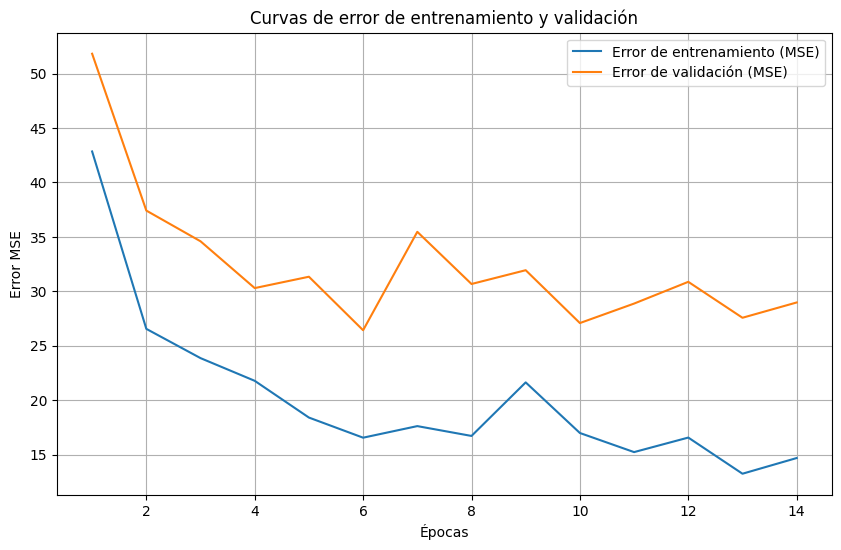

In [ ]:
# Cargar los errores guardados en el diccionario "errors"
epochs = list(errors.keys())
train_errors = [error[0] for error in errors.values()]
val_errors = [error[1] for error in errors.values()]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_errors, label='Error de entrenamiento (MSE)')
plt.plot(epochs, val_errors, label='Error de validación (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Error MSE')
plt.title('Curvas de error de entrenamiento y validación')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

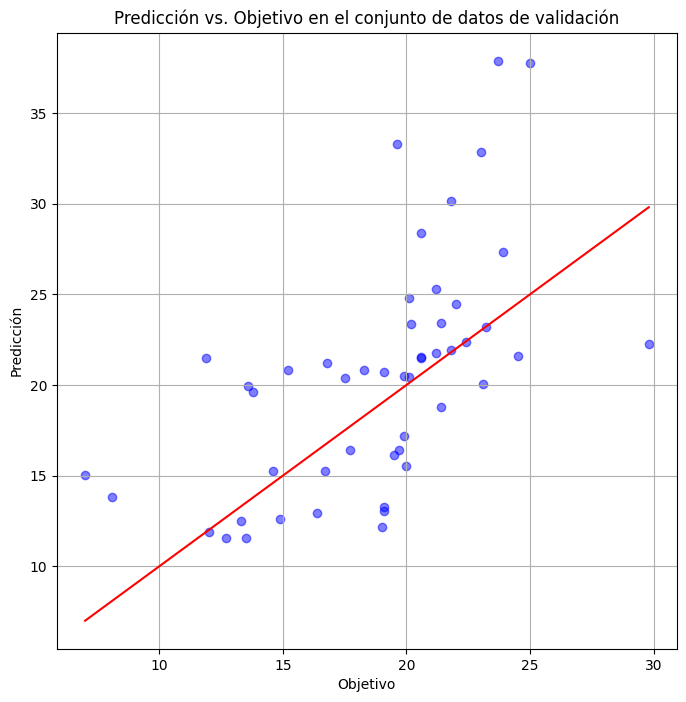

In [ ]:
# Predicciones en el conjunto de datos de validación
y_pred_val_all = pipeline.predict(X_val)

# Escoge un subconjunto aleatorio de predicciones y objetivos
subset_indices = np.random.choice(len(y_pred_val_all), size=len(y_pred_val_all), replace=False)
y_pred_val_subset = y_pred_val_all[subset_indices]
y_val_subset = y_val[subset_indices]

# Graficar predicciones vs. objetivos
plt.figure(figsize=(8, 8))
plt.scatter(y_val_subset, y_pred_val_subset, color='blue', alpha=0.5)
plt.plot([min(y_val_subset), max(y_val_subset)], [min(y_val_subset), max(y_val_subset)], color='red')
plt.title('Predicción vs. Objetivo en el conjunto de datos de validación')
plt.xlabel('Objetivo')
plt.ylabel('Predicción')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


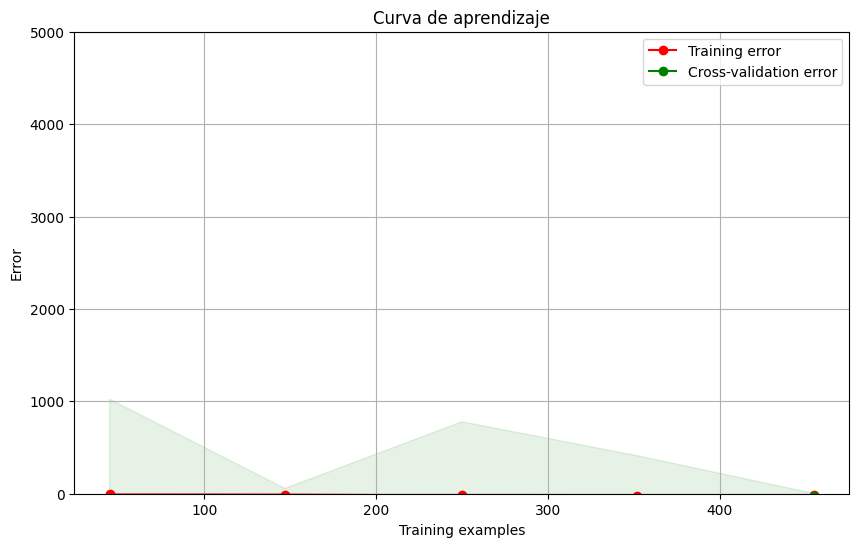

In [ ]:
# Define una función para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots learning curves for a given estimator.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt

# Usando la función para graficar las curvas de aprendizaje
title = "Curva de aprendizaje"
estimator = pipeline
plot_learning_curve(estimator, title, X, y, ylim=(0, 5000), cv=kfold, n_jobs=-1)

plt.show()